In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
sns.set()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
imdb = pd.read_csv('/content/APPENDED DATA.csv')
imdb.head()

,review,sentiment
0,I always wrote this series off as being a comp...,negative
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,negative
2,This movie was so poorly written and directed ...,negative
3,The most interesting thing about Miryang (Secr...,positive
4,"when i first read about ""berlin am meer"" i did...",negative


In [ ]:
imdb.sentiment.value_counts()

positive    20050
negative    20049
Name: sentiment, dtype: int64

In [ ]:
text = imdb['review'][0]
print(text)
print('\n')
print(word_tokenize(text))

I always wrote this series off as being a complete stink-fest because Jim Belushi was involved in it, and heavily. But then one day a tragic happenstance occurred. After a White Sox game ended I realized that the remote was all the way on the other side of the room somehow. Now I could have just gotten up and walked across the room to get the remote, or even to the TV to turn the channel. But then why not just get up and walk across the country to watch TV in another state? "Nuts to that", I said. So I decided to just hang tight on the couch and take whatever Fate had in store for me. What Fate had in store was an episode of this show, an episode about which I remember very little except that I had once again made a very broad, general sweeping blanket judgment based on zero objective or experiential evidence with nothing whatsoever to back my opinions up with, and once again I was completely right! This show is a total crud-pie! Belushi has all the comedic delivery of a hairy lighthou

In [ ]:
corpus = []
for text in imdb['review']:
  words=[word.lower() for word in word_tokenize(text)]
  corpus.append(words)

In [ ]:
num_words = len(corpus)
print(num_words)

55000


In [ ]:
imdb.shape

(55000, 2)

In [ ]:
train_size = int(imdb.shape[0]*0.8)
X_train = imdb.review[:train_size]
y_train = imdb.sentiment[:train_size]

X_test = imdb.review[train_size:]
y_test = imdb.sentiment[train_size:]

In [ ]:
from nltk.lm.preprocessing import pad_sequence
tokenizer = Tokenizer(num_words)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(X_train, maxlen=128, truncating='post', padding = 'post')

In [ ]:
X_train[0], len(X_train[0])

(array([    9,   208,  1041,    10,   207,   121,    13,   108,     3,
          610,  7859,  2987,    82,  1240,  5650,    12,   581,     7,
            8,     2,  2671,    17,    91,    26,   253,     3,  1576,
        17630,  3943,    98,     3,   446,  8893,   452,  1024,     9,
         1684,    11,     1,  2666,    12,    28,     1,    94,    19,
            1,    77,   486,     4,     1,   678,   822,   142,     9,
           96,    24,    38,  2031,    52,     2,  2328,   608,     1,
          678,     5,    75,     1,  2666,    37,    56,     5,     1,
          235,     5,   464,     1,  1203,    17,    91,   135,    20,
           38,    75,    52,     2,  1214,   608,     1,   707,     5,
          102,   235,     7,   156,  1100,  4505,     5,    11,     9,
          299,    33,     9,   879,     5,    38,  2968,  2565,    19,
            1,  5586,     2,   182,   861,  2026,    65,     7,  1102,
           15,    67,    47,  2026,    65,     7,  1102,    12,    31,
      

In [ ]:
X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test, maxlen=128, truncating='post', padding = 'post')

In [ ]:
X_test[0], len(X_test[0])

(array([    9,  1425,    19,   449,  1035,     5,   855,   174,     2,
          102,    10,  2092,  9884,   535,     8,  8978,    67,    15,
            9,    38,   422,   269,    53,  3779,    19,    47,    10,
           12,    41,    12,    10,    41,     3,   187,   258,   259,
            3,   944,   187,     7,   113,     2,   110,  1830,    52,
           12,    10,    41,     1,   565,   108,    49,  1836,    70,
            1,   416,    12,    10,    41,     3,  6366,   980,   252,
            2,    39,   682,  6366,   565,    47,     1,  2276,     6,
           10,   118,    41,   409,     9,    38,   153,   470,     1,
          175,   163,    67,   179,     5,  2111,     1,   488,     6,
         1103,  1278,    37,  1123,    43, 14296,     2,  2275,    33,
          135,   114,     9,   102,    82,     9,   557,    33,   105,
           48,   178,    41,    10,     2,     9,   232,    20,    26,
            5,   555,    31,   667,   365,     9,    24,   286,  8395,
      

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(44000, 128) (44000,)
(11000, 128) (11000,)


In [ ]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

creating a base model

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=100,
                    input_length=128, trainable=True))
model.add(LSTM(100, dropout=0.1, return_sequences=True))
model.add(LSTM(100, dropout=0.1))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 128, 100)          5500000   
                                                                 
 lstm (LSTM)                 (None, 128, 100)          80400     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 5660901 (21.59 MB)
Trainable params: 5660901 (21.59 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(X_train,y_train, epochs=5, batch_size=64, validation_data=(X_test,y_test))

Epoch 1/5
688/688 [==============================] - 439s 629ms/step - loss: 0.6521 - accuracy: 0.4665 - val_loss: 0.9889 - val_accuracy: 0.0000e+00
Epoch 2/5
688/688 [==============================] - 429s 624ms/step - loss: 0.5231 - accuracy: 0.6430 - val_loss: 1.7787 - val_accuracy: 0.4246
Epoch 3/5
688/688 [==============================] - 446s 647ms/step - loss: 0.4072 - accuracy: 0.6973 - val_loss: 3.1477 - val_accuracy: 0.3625
Epoch 4/5
688/688 [==============================] - 443s 645ms/step - loss: 0.0379 - accuracy: 0.7771 - val_loss: 9.5311 - val_accuracy: 0.3594
Epoch 5/5
688/688 [==============================] - 447s 651ms/step - loss: -0.2906 - accuracy: 0.7387 - val_loss: 13.8056 - val_accuracy: 0.4456


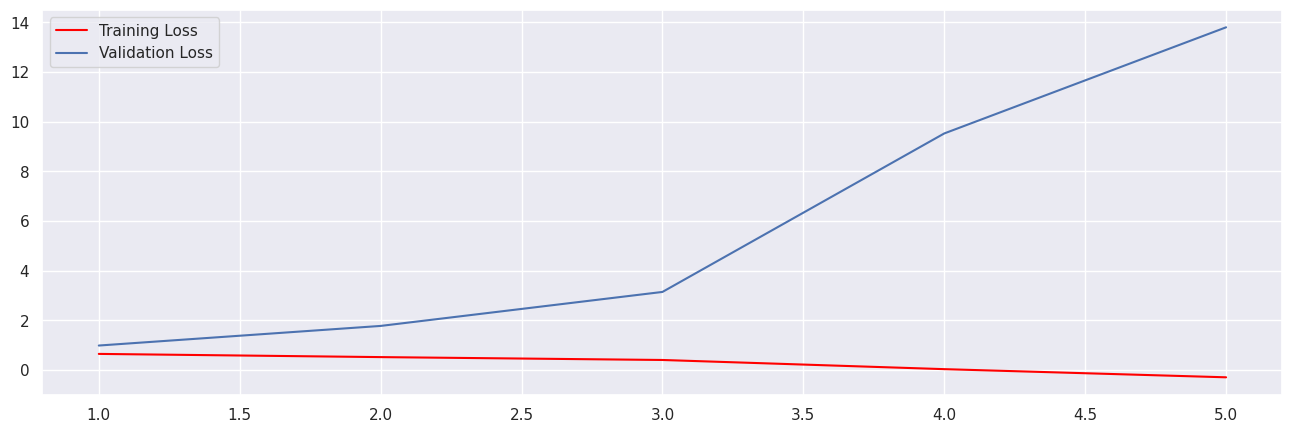

In [ ]:
plt.figure(figsize=(16,5))
epochs = range(1,len(history.history['accuracy'])+1)
plt.plot(epochs, history.history['loss'],'b',label='Training Loss',color='red')
plt.plot(epochs, history.history['val_loss'],'b',label='Validation Loss')
plt.legend()
plt.show()

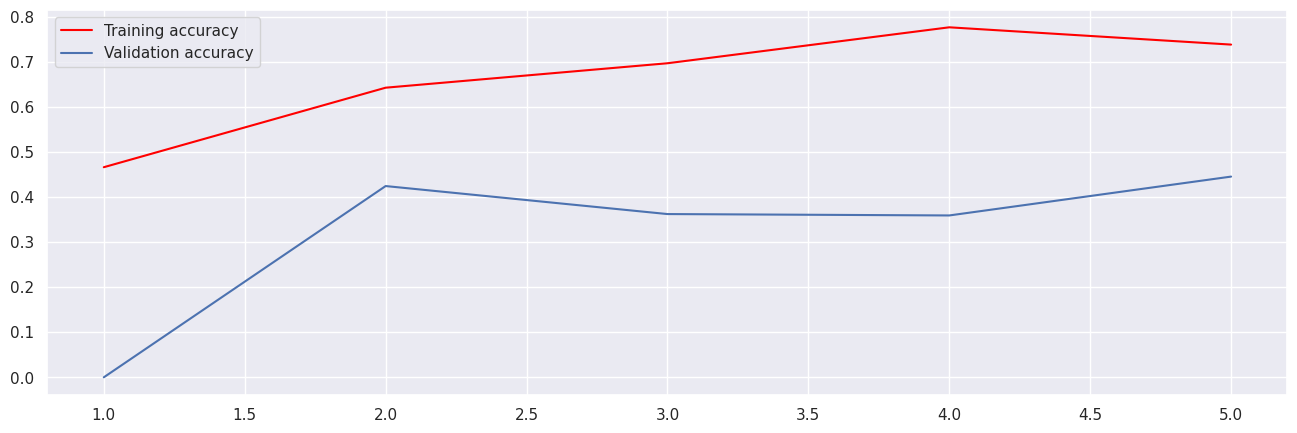

In [ ]:
plt.figure(figsize=(16,5))
epochs = range(1,len(history.history['accuracy'])+1)
plt.plot(epochs, history.history['accuracy'],'b',label='Training accuracy',color='red')
plt.plot(epochs, history.history['val_accuracy'],'b',label='Validation accuracy')
plt.legend()
plt.show()

In [ ]:
validation_sentence= ['This movie was not good at all. It had some good parts like the acting was pretty good but the story was not impressing at all']
validation_sentence_tokened = tokenizer.texts_to_sequences(validation_sentence)
validation_sentence_padded= pad_sequences(validation_sentence_tokened, maxlen=128,
                                         truncating='post',padding='post')
print(validation_sentence[0])
print("Probability of positive = {}".format(model.predict(validation_sentence_padded)[0]))

This movie was not good at all. It had some good parts like the acting was pretty good but the story was not impressing at all
1/1 [==============================] - 1s 949ms/step
Probability of positive = [0.94850034]


In [ ]:
validation_sentence= ['It had some bad parts like the storyline although the actors performed really-well and this is why overall I enjoyed it.']
validation_sentence_tokened = tokenizer.texts_to_sequences(validation_sentence)
validation_sentence_padded= pad_sequences(validation_sentence_tokened, maxlen=128,
                                         truncating='post',padding='post')
print(validation_sentence[0])
print("Probability of positive = {}".format(model.predict(validation_sentence_padded)[0]))

It had some bad parts like the storyline although the actors performed really-well and this is why overall I enjoyed it.
1/1 [==============================] - 0s 57ms/step
Probability of positive = [1.]


In [ ]:
validation_sentence= ['I can watch this movie forever just because of the beauty in its cinematography.']
validation_sentence_tokened = tokenizer.texts_to_sequences(validation_sentence)
validation_sentence_padded= pad_sequences(validation_sentence_tokened, maxlen=128,
                                         truncating='post',padding='post')
print(validation_sentence[0])
print("Probability of positive = {}".format(model.predict(validation_sentence_padded)[0]))

I can watch this movie forever just because of the beauty in its cinematography.
1/1 [==============================] - 0s 60ms/step
Probability of positive = [0.9019658]


USING BAYES CLASSIFIER

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download("stopwords")
stop_words = set(stopwords.words("english"))
stemmer = PorterStemmer()

def preprocess_text(text):
    words = text.split()
    words = [stemmer.stem(word) for word in words if word.lower() not in stop_words]
    return " ".join(words)

data['review'] = data['review'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from sklearn.model_selection import train_test_split

X = data['review']
y = data['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

count_vectorizer = CountVectorizer()
tfidf_transformer = TfidfTransformer()

X_train_counts = count_vectorizer.fit_transform(X_train)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

X_test_counts = count_vectorizer.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)


In [ ]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)


MultinomialNB()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = clf.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))


Accuracy: 0.8622
              precision    recall  f1-score   support

    negative       0.85      0.88      0.86      4961
    positive       0.88      0.85      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have predictions (y_pred) and true labels (y_test)
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.show()

In [ ]:
# Convert your text data into sets of words
def text_to_word_set(text):
    words = set(text.split())
    return words

# Example sentences for Jaccard Index calculation
sentence1 = 'This is a sample sentence for Jaccard Index calculation'
sentence2 = 'A different sentence to calculate Jaccard Index'

# Convert the sentences to sets of words
set1 = text_to_word_set(sentence1)
set2 = text_to_word_set(sentence2)

# Calculate Jaccard Index
intersection = len(set1.intersection(set2))
union = len(set1.union(set2))
jaccard_index = intersection / union

# Print the Jaccard Index
print("Jaccard Index:", jaccard_index)

In [ ]:
import numpy as np

# Example lists of class labels
y_true = [0, 1, 1, 0, 1, 0, 1, 1, 0, 0]
y_pred = [0, 0, 1, 0, 1, 1, 1, 1, 0, 0]

# Function to calculate the Gini Index
def calculate_gini_index(labels):
    unique_labels, label_counts = np.unique(labels, return_counts=True)
    total_samples = len(labels)
    gini_index = 1.0

    for label in unique_labels:
        label_probability = np.sum(labels == label) / total_samples
        gini_index -= label_probability ** 2

    return gini_index

# Calculate the Gini Index for true labels
gini_true = calculate_gini_index(y_true)

# Calculate the Gini Index for predicted labels
gini_pred = calculate_gini_index(y_pred)

# Print the Gini Index for true and predicted labels
print("Gini Index (True Labels):", gini_true)
print("Gini Index (Predicted Labels):", gini_pred)


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

# Assuming you have true labels (y_true) and predicted probabilities (y_pred) for the positive class

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred)

# Calculate the AUC-ROC score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

# Assuming you have true labels (y_true) and predicted labels (y_pred)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Extract TP, TN, FP, FN from the confusion matrix
TP = conf_matrix[1, 1]  # True Positives
TN = conf_matrix[0, 0]  # True Negatives
FP = conf_matrix[0, 1]  # False Positives
FN = conf_matrix[1, 0]  # False Negatives

# Calculate True Positive Rate (TPR) and False Positive Rate (FPR)
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)

print("True Positive Rate (TPR):", TPR)
print("False Positive Rate (FPR):", FPR)

#EDA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.probability import FreqDist

# Load your dataset
data = pd.read_csv("/content/IMDB Dataset.csv")

# Assuming you have a 'review_text' column in your dataset
reviews = data['review']

# Word Cloud for Common Words
all_reviews = ' '.join(reviews)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Common Words")
plt.show()

# Histogram of Review Lengths
review_lengths = [len(review.split()) for review in reviews]
plt.figure(figsize=(10, 5))
sns.histplot(review_lengths, kde=True)
plt.title("Distribution of Review Lengths")
plt.xlabel("Review Length")
plt.ylabel("Frequency")
plt.show()

# Sentiment Distribution
sentiment_counts = data['sentiment'].value_counts()
plt.figure(figsize=(6, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# Frequency of Common Words
common_words = [word for word in all_reviews.split()]
fdist = FreqDist(common_words)
plt.figure(figsize=(10, 5))
fdist.plot(30, title="Frequency Distribution of Common Words")
plt.show()


FileNotFoundError: ignored